# An Exploration of Breweries per State and Population


In [1]:
import pandas as pd
import json
import requests
from api_keys import census_key

#for census json pull in 
year = "2019"
dsource = "pep"
dname = "population"
cols = "NAME,POP,DATE_DESC"
group = "group(B02015)"
state = "*"

base_url = f'https://api.census.gov/data/{year}/{dsource}/{dname}'

data_url = f'{base_url}?get={cols}&for=state:{state}&key={census_key}'
            
response = requests.get(data_url).json()

In [2]:
#create df from JSON
initial_df = pd.DataFrame(response)
initial_df.head()

,0,1,2,3
0,NAME,POP,DATE_DESC,state
1,Alabama,4903185,7/1/2019 population estimate,01
2,Alaska,731545,7/1/2019 population estimate,02
3,Arizona,7278717,7/1/2019 population estimate,04
4,Arkansas,3017804,7/1/2019 population estimate,05


In [3]:
#remove unwanted columns
filtered_df = initial_df[[0,1]]
state_pop = filtered_df.drop([0,8,52])
#find & rename column titles 
list(state_pop.columns)
state_pop.columns = ["STATE","Population"]
state_pop.head()

,STATE,Population
1,Alabama,4903185
2,Alaska,731545
3,Arizona,7278717
4,Arkansas,3017804
5,California,39512223


In [4]:
#read in brewery count csv
csv_df = pd.read_csv('./brewery_count_by_state.csv')  
csv_df.head()

,STATE,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AK,20,23,25,25,28,35,36,45,51,59,66,72,75
1,AL,7,9,15,23,25,30,37,52,55,66,68,77,84
2,AR,5,7,13,18,23,29,34,44,53,58,70,76,82
3,AZ,37,45,55,59,77,91,110,130,146,157,170,179,184
4,CA,358,401,472,528,654,788,927,1106,1236,1370,1465,1524,1571


In [5]:
#drop na
clean_csv = csv_df.dropna()
clean_csv = clean_csv.drop([7])
clean_csv.head()

,STATE,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AK,20,23,25,25,28,35,36,45,51,59,66,72,75
1,AL,7,9,15,23,25,30,37,52,55,66,68,77,84
2,AR,5,7,13,18,23,29,34,44,53,58,70,76,82
3,AZ,37,45,55,59,77,91,110,130,146,157,170,179,184
4,CA,358,401,472,528,654,788,927,1106,1236,1370,1465,1524,1571


In [6]:
#create new df filtered to state, 2019 to be able to replace col names on
nineteen_csv = pd.DataFrame(clean_csv[["STATE","2019"]])
nineteen_csv.head()

,STATE,2019
0,AK,59
1,AL,66
2,AR,58
3,AZ,157
4,CA,1370


In [7]:
# create dict of abbrev names to full names
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

#replace abbrev with full names
nineteen_csv['STATE'] = nineteen_csv['STATE'].replace(states)

nineteen_csv.head()

,STATE,2019
0,Alaska,59
1,Alabama,66
2,Arkansas,58
3,Arizona,157
4,California,1370


In [32]:
#merge dfs
merged_df = pd.merge(state_pop, nineteen_csv, on = "STATE")

merged_df = merged_df.astype({"2019":"int","Population":"int"})

merged_df.head

<bound method NDFrame.head of              STATE  Population  2019
0          Alabama     4903185    66
1           Alaska      731545    59
2          Arizona     7278717   157
3         Arkansas     3017804    58
4       California    39512223  1370
5         Colorado     5758736   544
6         Delaware      973764    43
7      Connecticut     3565287   149
8          Florida    21477737   464
9          Georgia    10617423   158
10           Idaho     1787065   101
11          Hawaii     1415872    43
12        Illinois    12671821   372
13         Indiana     6732219   261
14            Iowa     3155070   137
15          Kansas     2913314    78
16        Kentucky     4467673   105
17       Louisiana     4648794    60
18           Maine     1344212   186
19        Maryland     6045680   159
20   Massachusetts     6892503   268
21        Michigan     9986857   577
22       Minnesota     5639632   267
23     Mississippi     2976149    22
24        Missouri     6137428   192
25      

In [25]:
# take a look at key stats
merged_df["2019"].describe()

count      50.000000
mean      231.380000
std       242.397455
min        22.000000
25%        65.250000
50%       146.000000
75%       365.500000
max      1370.000000
Name: 2019, dtype: float64

In [30]:
#grabbed lowest brewery count row 
merged_df.loc[merged_df['2019'] == 22]

,STATE,Population,2019
23,Mississippi,2976149,22


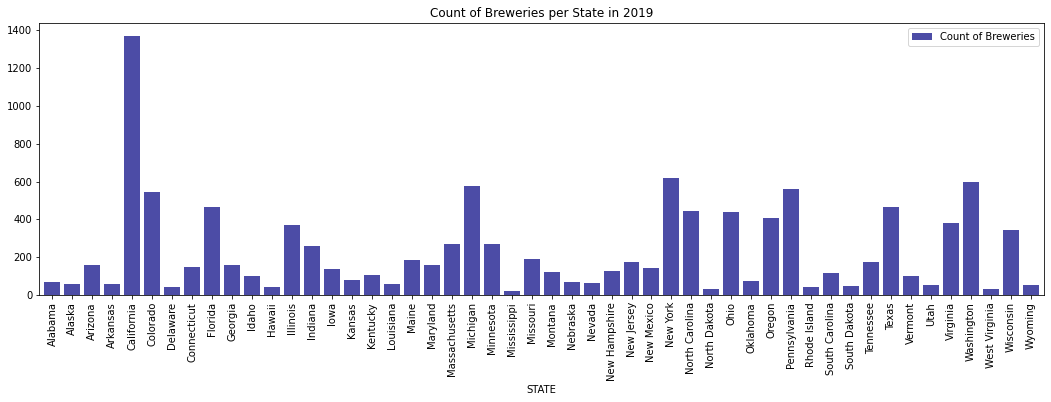

In [19]:
#create bar graph showing count of breweries per state

# import matplot
import matplotlib.pyplot as plt

brew_count = merged_df.plot.bar("STATE", "2019", width = .8, align = "center", color = "navy", alpha = .7, figsize = (18,5), title = "Count of Breweries per State in 2019", label = "Count of Breweries")


In [34]:
#create scatter showing relationship between brewery count and Population per state

import hvplot.pandas
import numpy as np 

scatter_counts = merged_df.hvplot.scatter(x='STATE', y='Population', c='2019')
scatter_counts.opts(xrotation=90)
scatter_counts.opts(title='Count of Breweries per State Compared to Population Size in 2019')

:Scatter   [STATE]   (Population,2019)